In [1]:
##API's Homework


In [2]:
# Initial imports

import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
 # Load .env enviroment variables (output should read true)
load_dotenv()

True

In [4]:
## Part 1 - Personal Finance Planner

In [5]:
##  Collect Crypto Prices Using the requests Library

In [6]:
 # Set current amount of crypto assets

my_btc = 1.2
my_eth = 5.3

In [7]:
# Crypto API URLs (from initial starter code)
btc_url = "https://api.alternative.me/v1/ticker/Bitcoin/"
eth_url = "https://api.alternative.me/v1/ticker/Ethereum/"

In [8]:
btc_url = btc_url + "?format-json"
eth_url = eth_url + "?format-json"

In [9]:
# Fetch current BTC price
btc_live_data = requests.get(btc_url).json()[0]['price_usd']
btc_live_data = (float(btc_live_data))
btc_live_data

43945.0

In [10]:
# Fetch current ETH price
eth_live_data = requests.get(eth_url).json()[0]['price_usd']
eth_live_data = (float(eth_live_data))
eth_live_data

2972.88

In [11]:
# store responses in variables - already done above


In [12]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_live_data

my_eth_value = my_eth * eth_live_data

In [13]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

# (output should read: The current value of your 1.2 BTC is $14309.16)
# (The current value of your 5.3 ETH is $2096.47)

The current value of your 1.2 BTC is $52734.00
The current value of your 5.3 ETH is $15756.26


In [14]:
# Damnit... breaks computer - (this was old notes :-) I got it now)

# ok, this one above took me a second as I kept getting errors, 
# but I came to realize the data wasn't pulling in past 2 decimals anyway
# hence the float

# moving on...

In [15]:
## Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)

In [16]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi

In [17]:
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

In [18]:
# Current amount of shares
# YOUR CODE HERE!
my_agg = 200
my_spy = 50

In [19]:
 # Set Alpaca API key and secret
# YOUR CODE HERE!
# Setup Alpaca API environment
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")



In [20]:
# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [21]:
# Format current date as ISO format
today = pd.Timestamp("2022-02-28", tz="America/New_York").isoformat()

In [22]:
# Set the tickers (from  starter code)
tickers = ["AGG", "SPY"]

In [23]:
# Set timeframe to '1D' for Alpaca API (from  starter code)
timeframe = "1D"

In [24]:
# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=today,
    end=today,
    limit=1000,
).df

In [25]:
# Preview DataFrame
# YOUR CODE HERE! 
df_ticker.head()

AGG                                       SPY  \
                             open    high     low   close    volume    open   
time                                                                          
2022-02-28 00:00:00-05:00  110.03  110.43  110.02  110.38  11173221  432.02   

                                                            
                            high    low   close     volume  
time                                                        
2022-02-28 00:00:00-05:00  438.2  430.7  436.59  121285011

In [26]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
df_closing_prices = pd.DataFrame()

In [27]:
for ticker in tickers:
    df_closing_prices[ticker] = df_ticker[ticker]["close"]

In [28]:
df_closing_prices.head()

,AGG,SPY
time,,
2022-02-28 00:00:00-05:00,110.38,436.59


In [29]:
df_closing_prices.index = df_closing_prices.index.date

In [30]:
df_closing_prices.head()

,AGG,SPY
2022-02-28,110.38,436.59


In [31]:
agg_close_price = float(df_closing_prices["AGG"])
spy_close_price = float(df_closing_prices["SPY"])

In [32]:
# Print AGG and SPY close prices (from  starter code)

print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")


## Output should read:
# Current AGG closing price: $119.445
# Current SPY closing price: $334.55

Current AGG closing price: $110.38
Current SPY closing price: $436.59


In [33]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

In [34]:
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

#Output should be The current value of your 50 SPY shares is $16727.50
                #The current value of your 200 AGG shares is $23889.00

The current value of your 50 SPY shares is $21829.50
The current value of your 200 AGG shares is $22076.00


In [35]:
## Savings Health Analysis

In [36]:
# Set monthly household income
monthly_income = 12000

In [37]:
# Create savings DataFrame
df_savings = pd.DataFrame(index=['Crypto','Shares'])
df_savings

""
Crypto
Shares


In [38]:
new_column_values = [my_btc_value+my_eth_value, my_spy_value+my_agg_value]

df_savings["Amount"] = new_column_values 

df_savings

,Amount
Crypto,68490.264
Shares,43905.500


In [39]:
# Display savings DataFrame (from  starter code)
display(df_savings)

,Amount
Crypto,68490.264
Shares,43905.500


<AxesSubplot:ylabel='Amount'>

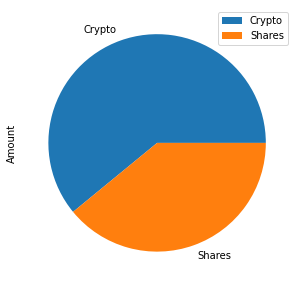

In [40]:
# Plot savings pie chart
df_savings.plot.pie(y='Amount', figsize=(5, 5))

In [41]:
# Set ideal emergency fund (from  starter code)
emergency_fund = monthly_income * 3

In [42]:
# Calculate total amount of savings
total_savings = df_savings.sum().item()
total_savings
# not really sure about .item() to be honest, but of all the options given by the valueerror
# (all,bool,empty, or any)....'item' was the only one that kept my values lol

112395.764

In [43]:
# Validate saving health
if total_savings > emergency_fund:
    print("Yo, your savings be on point playa!!! You got more tendies than 3x yo monthly Benjamins!")
elif total_savings == emergency_fund:
    print("They see you rollin, they hatin'... keep it up playa, you hit your 3x Benjamin goal on tendies!")
else:
    print(f'Awww snap... you short by ${emergency_fund - total_savings}...but keep saving those tendies, you almost there!!')

Yo, your savings be on point playa!!! You got more tendies than 3x yo monthly Benjamins!


In [44]:
# output should read " Congratulations! You have enough money in your emergency fund."

# ... close enough :-)

In [45]:
##Part 2 - Retirement Planning

In [46]:
#Monte Carlo Simulation

In [47]:
# Set start and end dates of five years back from today. (from starter)
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-03-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-02-28', tz='America/New_York').isoformat()

In [48]:
# Get 5 years' worth of historical data for SPY and AGG  
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

In [49]:
# Display sample data (from starter)
df_stock_data.head()

AGG                                        SPY  \
                             open     high     low    close   volume    open   
time                                                                           
2021-10-06 00:00:00-04:00  114.68  114.730  114.59  114.700  4748378  429.27   
2021-10-07 00:00:00-04:00  114.46  114.500  114.34  114.360  3586652  438.39   
2021-10-08 00:00:00-04:00  114.31  114.350  114.07  114.120  4207570  439.48   
2021-10-11 00:00:00-04:00  114.01  114.065  113.94  113.940  1999518  437.16   
2021-10-12 00:00:00-04:00  114.17  114.380  114.11  114.355  3521504  435.67   

                                                               
                               high     low   close    volume  
time                                                           
2021-10-06 00:00:00-04:00  435.1199  427.54  434.92  99477866  
2021-10-07 00:00:00-04:00  441.6800  438.20  438.64  64139858  
2021-10-08 00:00:00-04:00  439.8900  437.19  437.82  57510090  
2021-10-11 00:00:00-04:00  440.2600  434.62  434.67  54993389  
2021-10-12 00:00:00-04:00  436.1000  432.78  433.63  61078594

In [50]:
 # Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [51]:
# Printing the simulation input data
MC_thirty.portfolio_data.head()

AGG                                     \
                             open     high     low    close   volume   
time                                                                   
2021-10-06 00:00:00-04:00  114.68  114.730  114.59  114.700  4748378   
2021-10-07 00:00:00-04:00  114.46  114.500  114.34  114.360  3586652   
2021-10-08 00:00:00-04:00  114.31  114.350  114.07  114.120  4207570   
2021-10-11 00:00:00-04:00  114.01  114.065  113.94  113.940  1999518   
2021-10-12 00:00:00-04:00  114.17  114.380  114.11  114.355  3521504   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2021-10-06 00:00:00-04:00          NaN  429.27  435.1199  427.54  434.92   
2021-10-07 00:00:00-04:00    -0.002964  438.39  441.6800  438.20  438.64   
2021-10-08 00:00:00-04:00    -0.002099  439.48  439.8900  437.19  437.82   
2021-10-11 00:00:00-04:00    -0.001577  437.16  440.2600  434.62  434.67   
2021-10-12 00:00:00-04:00     0.003642  435.67  436.1000  432.78  433.63   

                                                  
                             volume daily_return  
time                                              
2021-10-06 00:00:00-04:00  99477866          NaN  
2021-10-07 00:00:00-04:00  64139858     0.008553  
2021-10-08 00:00:00-04:00  57510090    -0.001869  
2021-10-11 00:00:00-04:00  54993389    -0.007195  
2021-10-12 00:00:00-04:00  61078594    -0.002393

In [52]:
 # Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\16177\Documents\nu-chi-fin-pt-10-2021-u-c\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002662,0.992709,1.006405,0.986546,1.006318,1.000565,1.006178,1.002430,1.004793,0.990119,...,0.999771,0.996147,0.999667,1.003675,0.997241,1.007989,1.002644,1.004029,0.992754,1.005072
2,0.997423,1.002786,1.009605,0.986242,1.017826,0.993573,1.010071,1.004386,0.992467,0.988313,...,1.007835,0.993696,1.001219,0.991325,0.994878,1.022221,1.004214,1.006032,0.986002,1.002988
3,1.003944,1.002145,0.997366,0.996224,1.020324,1.000713,0.998620,1.007178,0.992525,0.993899,...,1.003571,0.995762,0.999632,0.985417,1.001491,1.016323,1.011430,1.002899,0.977139,0.992027
4,0.999165,0.990677,1.001071,0.992316,1.016967,0.995576,0.999579,1.007039,1.002688,0.991170,...,0.995319,0.986240,1.000045,0.978033,0.988165,1.011315,1.025212,1.002594,0.974009,0.989227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,0.246975,0.547721,0.471564,1.026293,0.268559,0.385609,1.040781,0.250050,0.219716,0.679400,...,0.293858,0.183351,0.326480,0.535938,0.118727,0.671068,0.306778,0.100760,0.364283,0.273758
7557,0.247539,0.552138,0.464653,1.023185,0.271267,0.388438,1.038193,0.250060,0.217607,0.676926,...,0.294439,0.183309,0.322757,0.536293,0.116936,0.671450,0.306546,0.100549,0.364741,0.273640
7558,0.247105,0.555830,0.461114,1.024508,0.271406,0.393289,1.036435,0.251418,0.216811,0.679770,...,0.295084,0.182867,0.320271,0.535105,0.117700,0.668871,0.310253,0.099863,0.364071,0.274924
7559,0.247083,0.559740,0.463428,1.029720,0.273334,0.395385,1.054028,0.251015,0.215140,0.673570,...,0.297325,0.181717,0.318145,0.535939,0.117993,0.671765,0.310644,0.100715,0.365549,0.276560


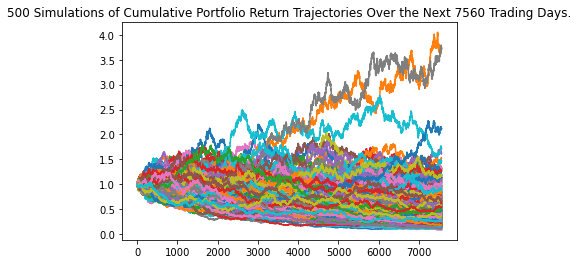

In [53]:
 # Plot simulation outcomes
line_plot = MC_thirty.plot_simulation()

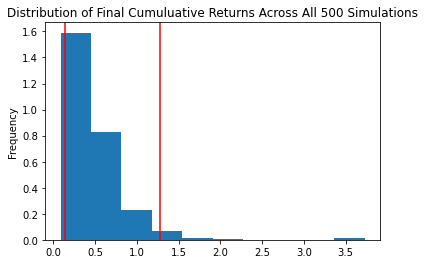

In [54]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty.plot_distribution()

In [55]:
## Retirement Analysis

In [56]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty.summarize_cumulative_return()

In [57]:
# Print summary statistics
tbl

count           500.000000
mean              0.488357
std               0.351859
min               0.084417
25%               0.280096
50%               0.400928
75%               0.603292
max               3.731732
95% CI Lower      0.143562
95% CI Upper      1.274037
Name: 7560, dtype: float64

In [58]:
## Calculate the expected portfolio return at the 95% lower and upper confidence intervals 
# based on a $20,000 initial investment.

In [59]:
# Set initial investment
initial_investment = 20000

In [60]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

In [61]:
# Print results (from starter)
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $2871.24 and $25480.74


In [62]:
#output should be like: There is a 95% chance that an initial investment of $20000 in the portfolio 
# over the next 30 years will end within in the range of $45939.5 and $536211.17  (NOT EVEN CLOSE)

In [63]:
## Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 50% increase in the initial investment.

In [64]:
# Set initial investment
initial_investment = 20000 * 1.5

In [65]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

In [66]:
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $4306.86 and $38221.1


In [67]:
### Optional Challenge below see starter for starter...

# I'M GOOD, THANKS THOUGH :-)